In [516]:
import pandas as pd
import nltk
from sortedcontainers import SortedSet
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sortedcontainers import SortedSet
data= pd.read_csv('spam_ham_dataset.csv')

In [517]:
from nltk.tokenize import RegexpTokenizer
#making a tokenization
regexp = RegexpTokenizer('\w+')

data['text_token']=data['text'].apply(regexp.tokenize)
data['text_token'].head(10)


data.head()

,Unnamed: 0,label,text,label_num,text_token
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,"[Subject, enron, methanol, meter, 988291, this..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"[Subject, hpl, nom, for, january, 9, 2001, see..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"[Subject, neon, retreat, ho, ho, ho, we, re, a..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"[Subject, photoshop, windows, office, cheap, m..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,"[Subject, re, indian, springs, this, deal, is,..."


In [518]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")
#clearing the data from stop words, and from words less than 2 letters
data['text_token'] = data['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
data['text_string'] = data['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dalia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<AxesSubplot: >

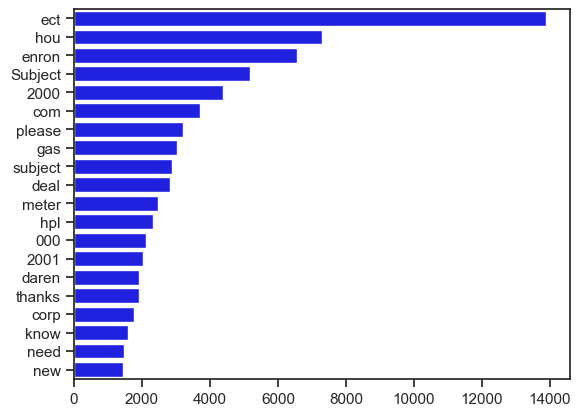

In [519]:
all_words = ' '.join([word for word in data['text_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)
from nltk.probability import FreqDist
import seaborn as sns
# frequency of the tokens
fdist = FreqDist(tokenized_words)
fd = FreqDist(fdist)
top_20 = fd.most_common(20)
fdist = pd.Series(dict(top_20))
sns.set_theme(style="ticks")
sns.barplot(y=fdist.index, x=fdist.values, color='blue')

In [520]:
import string
string.punctuation
#removing the punctuation from the data
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

data['text_wo_punct']=data['text_string'].apply(lambda x: remove_punctuation(x))
data.head()

,Unnamed: 0,label,text,label_num,text_token,text_string,text_wo_punct
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,"[Subject, enron, methanol, meter, 988291, foll...",Subject enron methanol meter 988291 follow not...,Subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"[Subject, hpl, nom, january, 9, 2001, see, att...",Subject hpl nom january 2001 see attached file...,Subject hpl nom january 2001 see attached file...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"[Subject, neon, retreat, ho, ho, ho, around, w...",Subject neon retreat around wonderful time yea...,Subject neon retreat around wonderful time yea...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"[Subject, photoshop, windows, office, cheap, m...",Subject photoshop windows office cheap main tr...,Subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,"[Subject, indian, springs, deal, book, teco, p...",Subject indian springs deal book teco pvr reve...,Subject indian springs deal book teco pvr reve...


printing the features names

In [521]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
docs=data['text_wo_punct'].to_list()
vectorizer.fit(docs)
print(vectorizer.get_feature_names())


['000', '0000', '000000', '000000000002858', '000000000049773', '000080', '000099', '0001', '00018', '00020608', '0004', '0005', '0008', '001', '0010', '001001', '0012', '001452', '002', '0022', '00221', '0025', '0027', '0028', '0029', '00298', '003', '0030', '003002', '0031', '0033', '0038', '004', '0042', '0043', '0044', '0045', '0046', '0047', '0049', '005', '00501723', '0051', '00534580', '006', '006600', '0067', '007', '0071', '0074', '008', '0080', '0085201238', '009', '0090', '010', '0100', '0101', '011', '0117', '012', '012603', '013', '0130', '014', '01405', '01408304990', '01474', '015', '016', '017', '0170', '01778', '0182', '0184', '019', '019017', '01915', '020', '0200', '02010207', '021', '022', '0232', '024', '025', '0255', '025648', '026', '027', '028', '02886', '02897893', '029', '030', '0300', '03090806', '031', '0310041', '03149', '032', '0324', '0325567', '033', '0331', '034', '0347', '035', '0357', '036', '0361770', '0363', '036474336', '037', '0373', '0375', '038'

C:\Users\dalia\anaconda3\envs\dsProject\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


train and test division

In [522]:
from sklearn.model_selection import train_test_split
#Division of the data for train and test
train, test = train_test_split(data,test_size=0.3,random_state=1)


In [523]:
train_text = train[~pd.isnull(train['text_wo_punct'])]['text_wo_punct']
test_text = test[~pd.isnull(test['text_wo_punct'])]['text_wo_punct']
print (f"The size of the train is {train.shape[0]} and test size is {test.shape[0]} records.")

The size of the train is 3619 and test size is 1552 records.


TF/IDF transforming the test and train data

In [524]:
#transform text to features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer = CountVectorizer()
TF_IDF_matrix_input_train = vectorizer.fit_transform(train_text)
TF_IDF_matrix_input_test = vectorizer.transform(test_text)


getting the expected output

In [525]:
expected_output_train = train[~pd.isnull(train['text_wo_punct'])]['label_num']
expected_output_test = test[~pd.isnull(test['text_wo_punct'])]['label_num']

creating the classifier-logistic regression with TF/IDF

In [526]:
#train classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1,C=5, max_iter=1000)
classifier.fit(TF_IDF_matrix_input_train, expected_output_train)
predicted = classifier.predict(TF_IDF_matrix_input_test)

creating the metrics

In [527]:
from sklearn import metrics
precision = metrics.precision_score(expected_output_test,predicted)
recall = metrics.recall_score(expected_output_test,predicted)
accuracy= metrics.accuracy_score(expected_output_test,predicted)

transforming the train and test data to bag of words

In [528]:
countvec = CountVectorizer(stop_words='english',ngram_range=(2,3))
bow_input_train = countvec.fit_transform(train_text)
bow_input_test= countvec.transform(test_text)


creating the classifier-logistic regression with BAG OF WORDS

In [529]:
classifier = LogisticRegression(random_state=1,C=5, max_iter=700)
classifier.fit(bow_input_train, expected_output_train)
predicted = classifier.predict(bow_input_test)

calculating the metrics with bag of words

In [530]:
recall_bow = metrics.recall_score(expected_output_test,predicted)
precision_bow = metrics.precision_score(expected_output_test,predicted)
accuracy_bow= metrics.accuracy_score(expected_output_test,predicted)

Implementation of lemmatizer on our data

In [531]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]

    return ' '.join(words)
data['text_lem'] = data['text_wo_punct'].apply(lemmatize_words)



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dalia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dalia\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


dividing our data into train and test after lemmatizer

In [532]:
train, test = train_test_split(data,test_size=0.3,random_state=1)
train_text = train[~pd.isnull(train['text_lem'])]['text_lem']
test_text = test[~pd.isnull(test['text_lem'])]['text_lem']

vectorizer our data with TF/IDF and transform with  lemmatizer

In [533]:
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer = CountVectorizer()
TF_IDF_lem_input_train = vectorizer.fit_transform(train_text)
TF_IDF_lem_input_test = vectorizer.transform(test_text)

getting the output data

In [534]:
expected_output_train = train[~pd.isnull(train['text_lem'])]['label_num']
expected_output_test = test[~pd.isnull(test['text_lem'])]['label_num']

creating the classifier-logistic regression with TF/IDF and lemmatizer

In [535]:
classifier = LogisticRegression(random_state=1,C=5, max_iter=1000)
classifier.fit(TF_IDF_lem_input_train, expected_output_train)
predicted = classifier.predict(TF_IDF_lem_input_test)

calculating our matrix

In [536]:
precision_lem_TF = metrics.precision_score(expected_output_test,predicted)
recall_lem_TF= metrics.recall_score(expected_output_test,predicted)
accuracy_lem_TF= metrics.accuracy_score(expected_output_test,predicted)

Implementation of lemmatizer with bag of words

In [537]:
countvec = CountVectorizer(stop_words='english',ngram_range=(2,3))
bow_input_train_lem = countvec.fit_transform(train_text)
bow_input_test_lem= countvec.transform(test_text)


reating the classifier-logistic regression with BOW and lemmatizer

In [538]:
classifier = LogisticRegression(random_state=1, C=5, max_iter=700)
classifier.fit(bow_input_train_lem, expected_output_train)
predicted = classifier.predict(bow_input_test_lem)


calculating our metrix

In [539]:
recall_bow_lem = metrics.recall_score(expected_output_test, predicted)
precision_bow_lem= metrics.precision_score(expected_output_test, predicted)
accuracy_bow_lem = metrics.accuracy_score(expected_output_test, predicted)

making a DF of all our metrix based on all the classification above

In [540]:
d = {'recall': [recall, recall_bow,recall_lem_TF,recall_bow_lem], 'precision': [precision, precision_bow,precision_lem_TF,precision_bow_lem],'accuracy':[accuracy,accuracy_bow,accuracy_lem_TF,accuracy_bow_lem ]}
df12 = pd.DataFrame(data=d,index=['TF/IDF','Bag of words',' TF/IDF lemmatizer','Bag of words lemmatizer'])
df12


,recall,precision,accuracy
TF/IDF,0.973392,0.954348,0.978737
Bag of words,0.980044,0.846743,0.942655
TF/IDF lemmatizer,0.964523,0.968820,0.980670
Bag of words lemmatizer,0.980044,0.863281,0.949098


In [541]:
'''
TF/IDF lemmatizer
This is the most accurate run, because the lemmatizer changes words, that is, if one word was in the past tense, it will transfer it to its simple tense. Which means that it groups words together for us, much more than the other models that treated each word separately and didn't know that they were related together.
'''

"\nThis is the most accurate run, because the lemmatizer changes words, that is, if one word was in the past tense, it will transfer it to its simple tense. Which means that it groups words together for us, much more than the other models that treated each word separately and didn't know that they were related together.\n"